In [453]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf
from keras.layers import InputLayer, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.models import Sequential






%matplotlib inline
pd.options.display.max_columns = None


#Load dataset
csv_path='CarPrice_Assignment.csv'
cars_dataset = pd.read_csv(csv_path)
cars_dataset.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [454]:
#Descibe dataset
cars_dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [455]:
cars_dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [456]:
                
for car in cars_dataset:
    print(f"{car} - {cars_dataset[car].nunique()}")


car_ID - 205
symboling - 6
CarName - 147
fueltype - 2
aspiration - 2
doornumber - 2
carbody - 5
drivewheel - 3
enginelocation - 2
wheelbase - 53
carlength - 75
carwidth - 44
carheight - 49
curbweight - 171
enginetype - 7
cylindernumber - 7
enginesize - 44
fuelsystem - 8
boreratio - 38
stroke - 37
compressionratio - 32
horsepower - 59
peakrpm - 23
citympg - 29
highwaympg - 30
price - 189


In [457]:
cars_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [458]:
cars_dataset['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [459]:
cars_dataset['CarName'] = cars_dataset['CarName'].str.split(' ',expand=True)[0]
cars_dataset['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [460]:
cars_dataset['CarName'] = cars_dataset['CarName'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

cars_dataset['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [461]:
cars_dataset=cars_dataset.drop(['car_ID'],axis=1)
cars_dataset.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


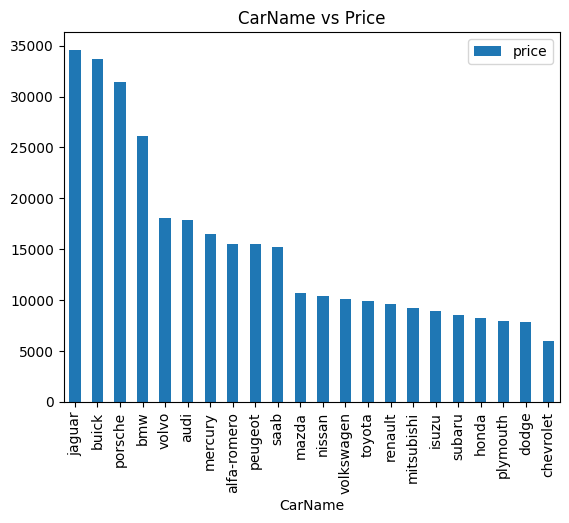

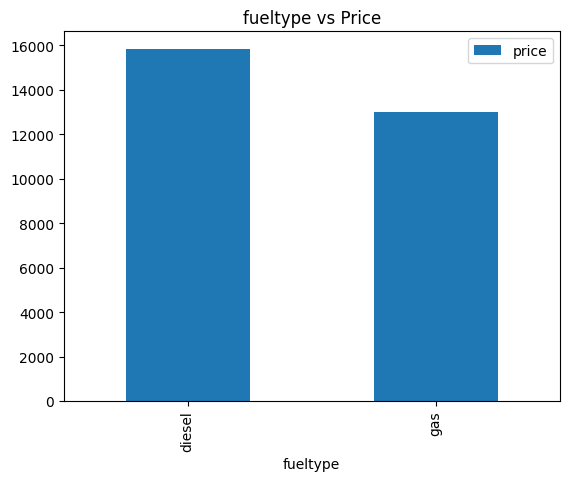

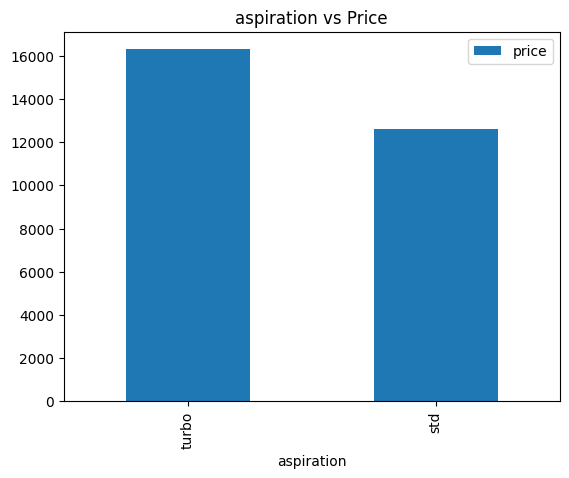

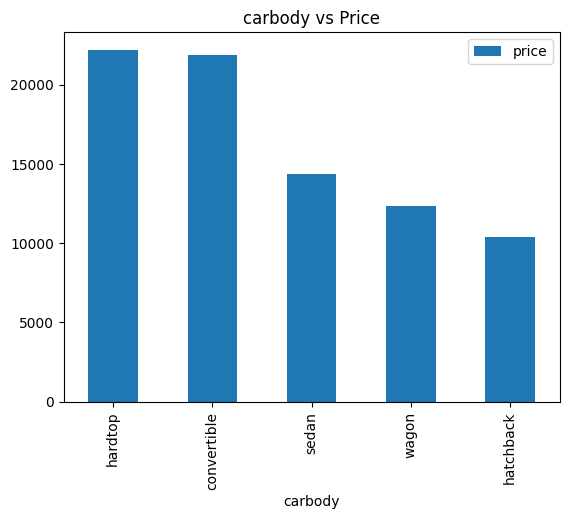

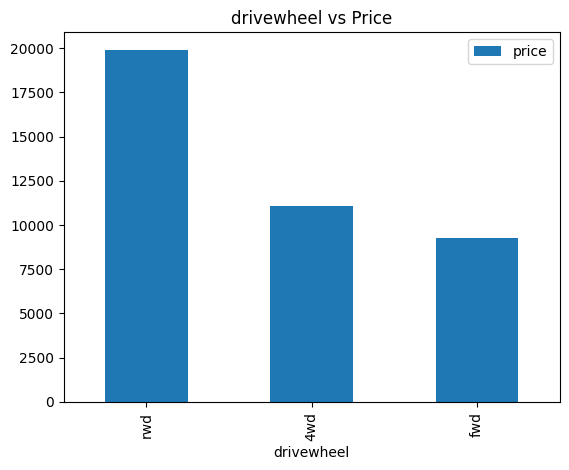

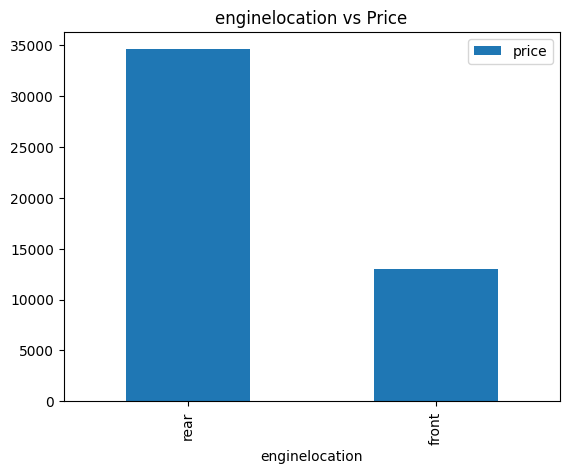

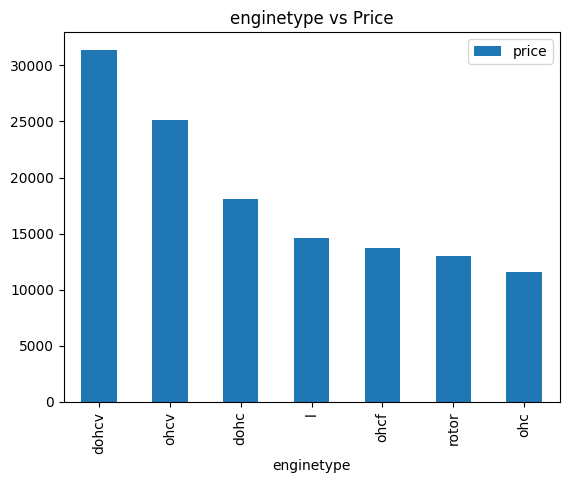

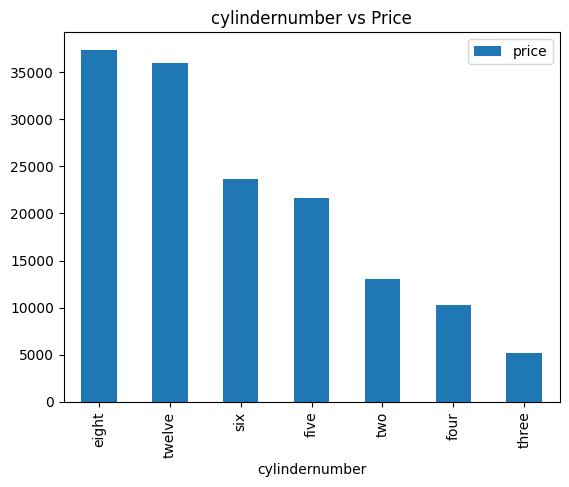

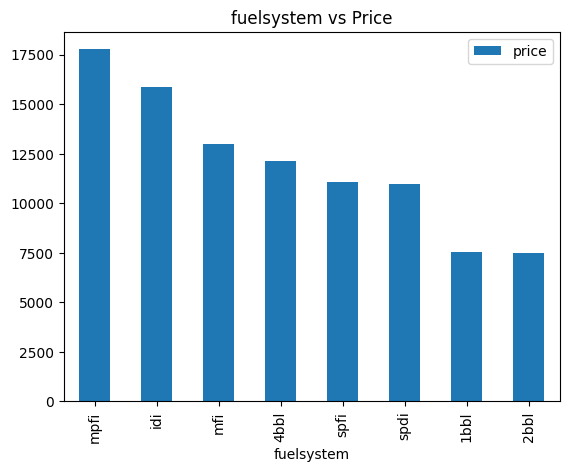

In [462]:
def compare_w_price(elements):
    cmp_plot=pd.DataFrame(cars_dataset.groupby(elements)['price'].mean().sort_values(ascending = False))
    cmp_plot.plot(kind="bar")
    plt.title(elements + " vs Price")

compare_w_price("CarName")
compare_w_price("fueltype")
compare_w_price("aspiration")
compare_w_price("carbody")
compare_w_price("drivewheel")
compare_w_price("enginelocation")
compare_w_price("enginetype")
compare_w_price("cylindernumber")
compare_w_price("fuelsystem")


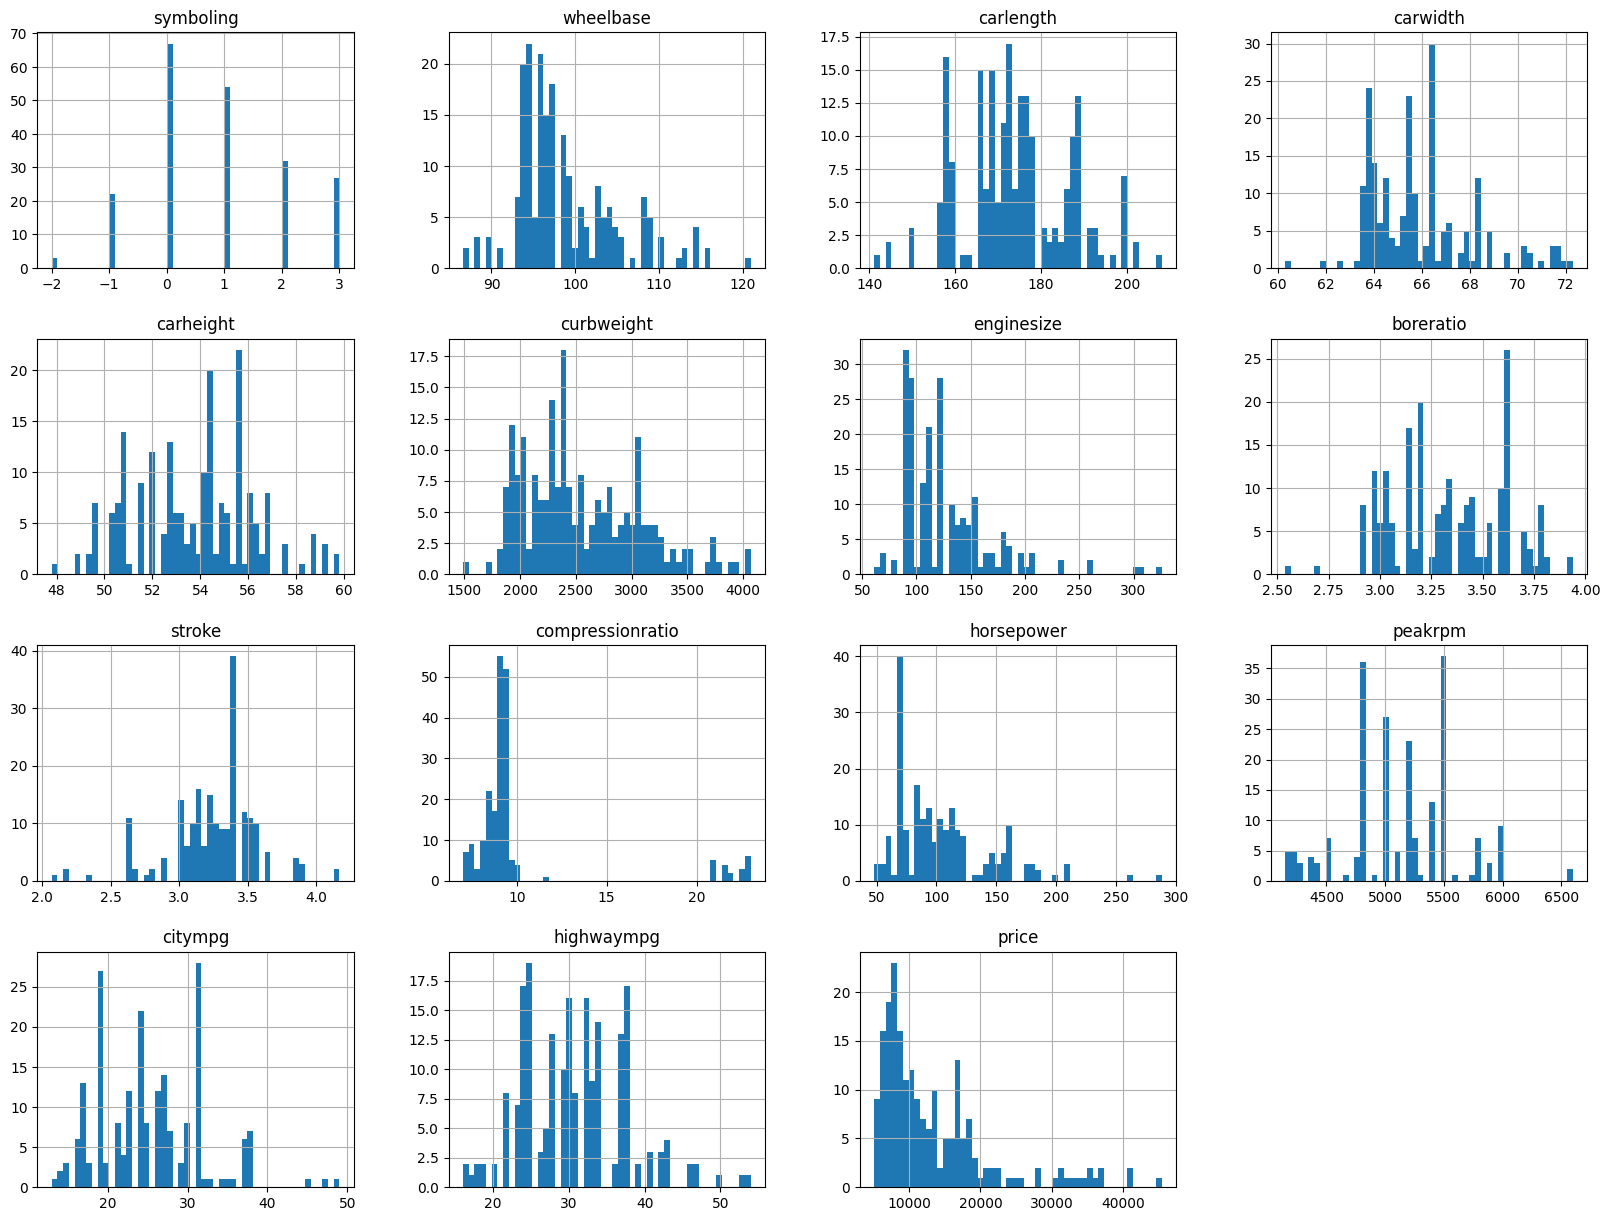

In [463]:
cars_dataset.hist(bins=50,figsize=(20,15))
plt.show()

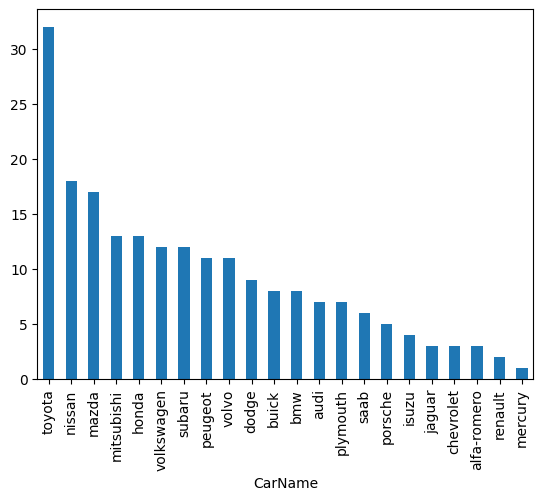

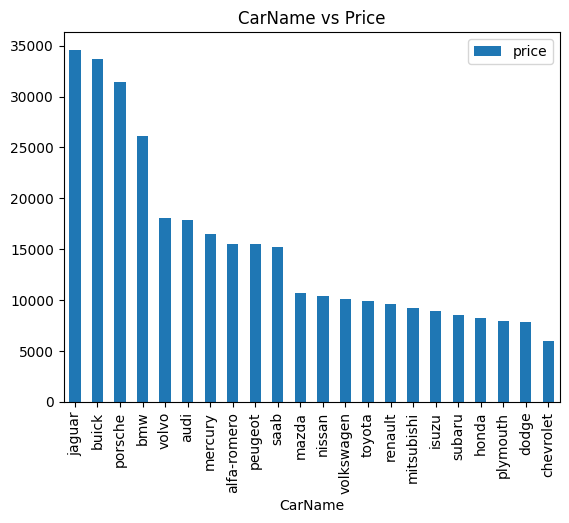

In [464]:
ax=cars_dataset['CarName'].value_counts().plot(kind='bar',stacked=True)
compare_w_price("CarName")

In [465]:
selected_dataset=cars_dataset
selected_dataset.head()



,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [466]:
selected_dataset2 = pd.get_dummies(selected_dataset, columns=selected_dataset.select_dtypes('object').columns, drop_first=False)
selected_dataset2.head()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False


In [467]:

X= selected_dataset2.drop('price', axis=1)
y= selected_dataset2['price']
indices=y.values

X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(X,y,indices, test_size=0.2, random_state=42)


In [468]:
# def find_weight_bias(x_train, y_train):
#     weight_count = x_train.shape[1]
#     w = np.zeros(weight_count)
#     b = 0
#     learning_rate = 0.001
#     epochs = 100000
#     n = len(x_train[0])
#     for i in range(epochs):
#         y_pred = np.dot(x_train, w) + b
#         dw = (-2/n) * np.sum(x_train.T * (y_train - y_pred), axis=1)
#         db = (-2/n) * np.sum(y_train - y_pred)
#         w = w - learning_rate * dw
#         b = b - learning_rate * db
#     print("Weight is", w)
#     print("Bias is", b)
#     return w, b

# # linear regression without sklearn


# def prediction(x_test, w, b):
#     return np.dot(x_test,w) + b


# #convert pandas dataframe to numpy array
# x_train2 = X_train.to_numpy()
# y_train1 = y_train.to_numpy()
# x_test2 = X_test.to_numpy()
# y_test1 = y_test.to_numpy()
# #normalize data
# x_train1 = (x_train2 - x_train2.mean()) / x_train2.std()
# x_test1 = (x_test2 - x_test2.mean()) / x_test2.std()
# #find weight and bias
# w, b = find_weight_bias(x_train1, y_train1)
# y_pred = prediction(x_test1, w, b)
# print("Linear Regression score is",r2_score(y_test1,y_pred))
# #plot comparison
# plt.figure(1, figsize=(20, 10))
# plt.subplot(221)
# plt.plot(y_test1,"g",label="Price")
# plt.plot(y_pred,"r",label="LinearRegression")
# plt.grid(True)
# plt.legend(loc="best")
# plt.title("Linear Regression vs Price")

In [469]:
#import scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

model1= LinearRegression()
model1.fit(X_train, y_train)
prediction1=model1.predict(X_test)
print("Linear Regression score is",r2_score(y_test,prediction1))

model2=RandomForestRegressor(max_depth=10,n_estimators=100)
model2.fit(X_train, y_train)
prediction2=model2.predict(X_test)
print("Random Forest score is",r2_score(y_test,prediction2))

model3=KNeighborsRegressor(n_neighbors=1)
model3.fit(X_train, y_train)
prediction3=model3.predict(X_test)
print("KNeighbors score is",r2_score(y_test,prediction3))

model4 = DecisionTreeRegressor(max_depth=6)
model4.fit(X_train, y_train)
prediction4=model4.predict(X_test)
print("Decision Tree score is",r2_score(y_test,prediction4))
# #visualize decision tree
# from sklearn import tree
# plt.figure(figsize=(20,10))
# tree.plot_tree(model4, filled=True)
# plt.show()

model5 = SVR(kernel='linear',epsilon=4000)
model5.fit(X_train, y_train)
prediction5=model5.predict(X_test)
print("SVR score is",r2_score(y_test,prediction5))






Linear Regression score is 0.9010854026798518
Random Forest score is 0.9578747729029772
KNeighbors score is 0.8549399077725732
Decision Tree score is 0.9005115801925722
SVR score is 0.8226058688623855


In [470]:
for i in range (1,10):
    model5 = SVR(kernel='linear',epsilon=i*1000)
    model5.fit(X_train, y_train)
    prediction5=model5.predict(X_test)
    print("SVR score is",r2_score(y_test,prediction5))

SVR score is 0.8004746240392482
SVR score is 0.7974541620461859
SVR score is 0.8058129087618227
SVR score is 0.8226058688623855
SVR score is 0.8273204874024602
SVR score is 0.8258748921050172
SVR score is 0.7977564351232717
SVR score is 0.8219367424894228
SVR score is 0.7957133834499537


In [471]:
from keras.callbacks import EarlyStopping

model6 = Sequential()
optim = Adam(learning_rate=0.01)
model6.add(InputLayer(input_shape=(X_train.shape[1],)))
model6.add(Dense(256,activation="relu",kernel_initializer="normal"))
model6.add(Dense(128,activation="relu",kernel_initializer="normal"))
model6.add(Dense(64,activation="relu",kernel_initializer="normal"))
model6.add(Dense(32,activation="relu",kernel_initializer="normal"))
model6.add(Dense(1,activation="linear",kernel_initializer="normal"))

model6.compile(loss="mse",optimizer= optim,metrics="mae")

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Include the early stopping callback in the fit method
history=model6.fit(scaler.fit_transform(X_train),y_train,batch_size=16,epochs=1000,validation_data=(scaler.transform(X_test),y_test), callbacks=[early_stopping])

prediction6 = model6.predict(scaler.transform(X_test))
print("Neural Network score is",r2_score(y_test,prediction6))


Epoch 1/1000
11/11 [==============================] - 1s 19ms/step - loss: 232588992.0000 - mae: 13145.7441 - val_loss: 238427088.0000 - val_mae: 12657.5117
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 127788272.0000 - mae: 8749.2920 - val_loss: 95236680.0000 - val_mae: 9099.1172
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 52055996.0000 - mae: 5210.6543 - val_loss: 57474704.0000 - val_mae: 3974.7244
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 29484122.0000 - mae: 4127.5190 - val_loss: 26115928.0000 - val_mae: 3116.5205
Epoch 5/1000
11/11 [==============================] - 0s 4ms/step - loss: 19944916.0000 - mae: 2660.9990 - val_loss: 21583304.0000 - val_mae: 3419.6196
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 16000529.0000 - mae: 3012.2156 - val_loss: 31050372.0000 - val_mae: 4079.1360
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 13236900

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


Text(0.5, 1.0, 'Loss vs Val_loss')

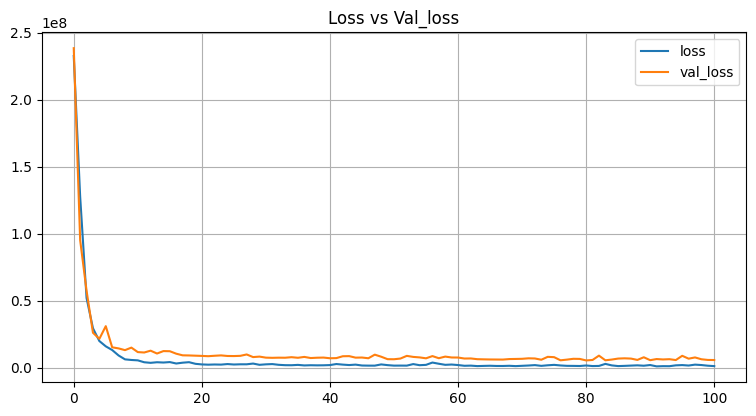

In [472]:

#loss and val loss plot
print(history.history.keys())
plt.figure(1, figsize=(20, 10))
plt.subplot(221)
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.grid(True)
plt.legend(loc="best")
plt.title("Loss vs Val_loss")


In [473]:
from keras.callbacks import EarlyStopping

model7 = Sequential()
optim = Adam(learning_rate=0.01)
model7.add(InputLayer(input_shape=(X_train.shape[1],)))
model7.add(Dense(512,activation="relu",kernel_initializer="normal"))
model7.add(Dense(256,activation="relu",kernel_initializer="normal"))
model7.add(Dense(128,activation="relu",kernel_initializer="normal"))
model7.add(Dense(64,activation="relu",kernel_initializer="normal"))
model7.add(Dense(32,activation="relu",kernel_initializer="normal"))
model7.add(Dense(1,activation="linear",kernel_initializer="normal"))

model7.compile(loss="mse",optimizer= optim,metrics="mae")

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Include the early stopping callback in the fit method
history=model7.fit(scaler.fit_transform(X_train),y_train,batch_size=16,epochs=1000,validation_data=(scaler.transform(X_test),y_test), callbacks=[early_stopping])

prediction7 = model7.predict(scaler.transform(X_test))
print("Neural Network score is",r2_score(y_test,prediction7))



Epoch 1/1000
11/11 [==============================] - 1s 20ms/step - loss: 212781536.0000 - mae: 12420.2305 - val_loss: 77616144.0000 - val_mae: 5407.6143
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 78974832.0000 - mae: 6292.2212 - val_loss: 97393376.0000 - val_mae: 6330.0542
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 39759224.0000 - mae: 4708.6191 - val_loss: 42200440.0000 - val_mae: 3473.0222
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 19676542.0000 - mae: 3101.7144 - val_loss: 17247356.0000 - val_mae: 2778.9622
Epoch 5/1000
11/11 [==============================] - 0s 6ms/step - loss: 12760273.0000 - mae: 2688.3281 - val_loss: 16088515.0000 - val_mae: 2861.8718
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 7902862.0000 - mae: 2146.9424 - val_loss: 14239490.0000 - val_mae: 2723.9309
Epoch 7/1000
11/11 [==============================] - 0s 6ms/step - loss: 5672632.0000

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


Text(0.5, 1.0, 'Loss vs Val_loss')

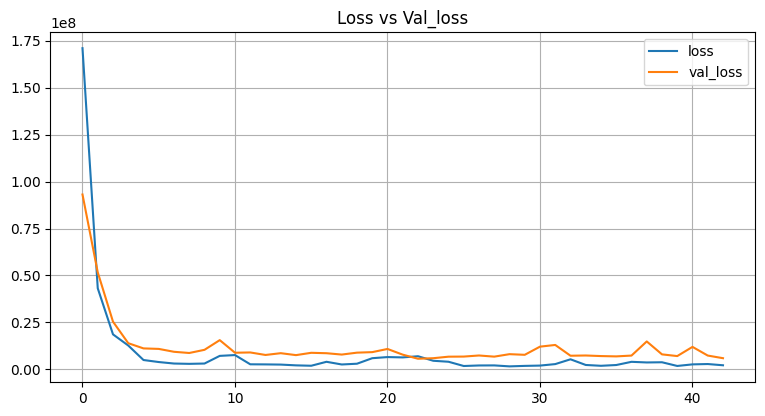

In [477]:
#loss and val loss plot
print(history.history.keys())
plt.figure(1, figsize=(20, 10))
plt.subplot(221)
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.grid(True)
plt.legend(loc="best")
plt.title("Loss vs Val_loss")


In [475]:
from keras.callbacks import EarlyStopping
model8 = Sequential()
optim = Adam(learning_rate=0.01)
model8.add(InputLayer(input_shape=(X_train.shape[1],)))
model8.add(Dense(1024,activation="relu",kernel_initializer="normal"))
model8.add(Dense(512,activation="relu",kernel_initializer="normal"))
model8.add(Dense(256,activation="relu",kernel_initializer="normal"))
model8.add(Dense(128,activation="relu",kernel_initializer="normal"))
model8.add(Dense(64,activation="relu",kernel_initializer="normal"))
model8.add(Dense(1,activation="linear",kernel_initializer="normal"))


model8.compile(loss="mse",optimizer= optim,metrics="mae")

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Include the early stopping callback in the fit method
history=model8.fit(scaler.fit_transform(X_train),y_train,batch_size=16,epochs=1000,validation_data=(scaler.transform(X_test),y_test), callbacks=[early_stopping])

prediction8 = model8.predict(scaler.transform(X_test))
print("Neural Network score is",r2_score(y_test,prediction7))

Epoch 1/1000
11/11 [==============================] - 1s 23ms/step - loss: 170947760.0000 - mae: 10760.8730 - val_loss: 93092032.0000 - val_mae: 5748.6113
Epoch 2/1000
11/11 [==============================] - 0s 11ms/step - loss: 43201448.0000 - mae: 4605.2827 - val_loss: 51672460.0000 - val_mae: 5081.1030
Epoch 3/1000
11/11 [==============================] - 0s 10ms/step - loss: 18671344.0000 - mae: 3218.2097 - val_loss: 25430218.0000 - val_mae: 3891.9319
Epoch 4/1000
11/11 [==============================] - 0s 9ms/step - loss: 12747737.0000 - mae: 2803.8269 - val_loss: 13977132.0000 - val_mae: 2494.1221
Epoch 5/1000
11/11 [==============================] - 0s 10ms/step - loss: 5022730.0000 - mae: 1620.3131 - val_loss: 11203897.0000 - val_mae: 2333.8813
Epoch 6/1000
11/11 [==============================] - 0s 11ms/step - loss: 3946666.5000 - mae: 1542.3496 - val_loss: 10937356.0000 - val_mae: 2344.1072
Epoch 7/1000
11/11 [==============================] - 0s 12ms/step - loss: 3152866.

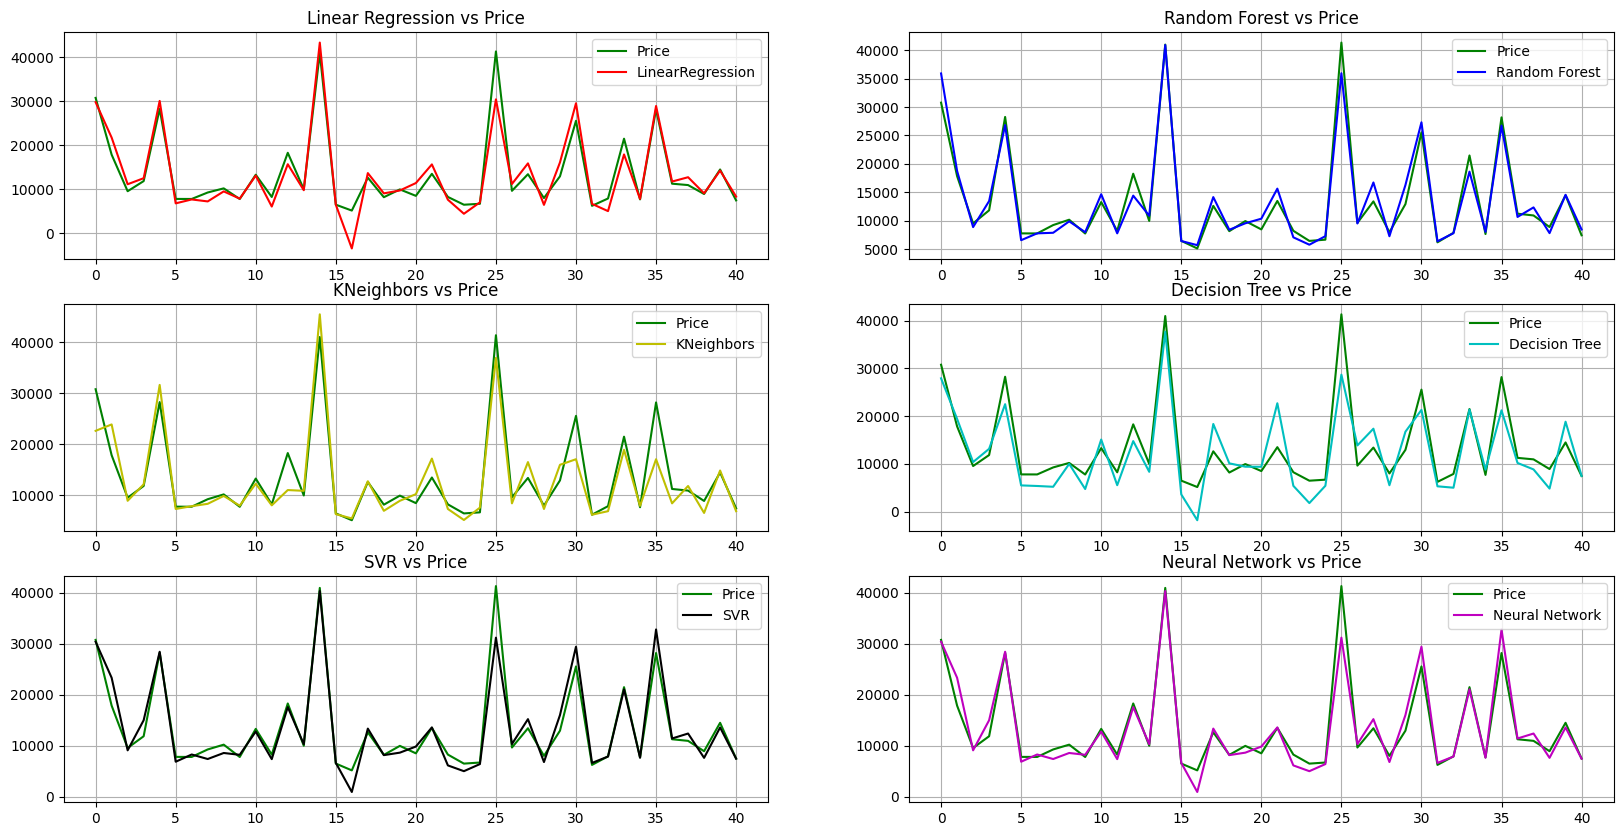

In [476]:

plt.figure(1, figsize=(20, 10))
plt.subplot(321)
plt.plot(indices_test,"g",label="Price")
plt.plot(prediction1,"r",label="LinearRegression")
plt.grid(True)
plt.legend(loc="best")
plt.title("Linear Regression vs Price")

plt.subplot(322)
plt.plot(indices_test,"g",label="Price")
plt.plot(prediction2,"b",label="Random Forest")
plt.grid(True)
plt.legend(loc="best")
plt.title("Random Forest vs Price")

plt.subplot(323)
plt.plot(indices_test,"g",label="Price")
plt.plot(prediction3,"y",label="KNeighbors")
plt.grid(True)
plt.legend(loc="best")
plt.title("KNeighbors vs Price")

plt.subplot(324)
plt.plot(indices_test,"g",label="Price")
plt.plot(prediction5,"c",label="Decision Tree")
plt.grid(True)
plt.legend(loc="best")
plt.title("Decision Tree vs Price")

plt.subplot(325)
plt.plot(indices_test,"g",label="Price")
plt.plot(prediction6,"k",label="SVR")
plt.grid(True)
plt.legend(loc="best")
plt.title("SVR vs Price")

plt.subplot(326)
plt.plot(indices_test,"g",label="Price")
plt.plot(prediction6,"m",label="Neural Network")
plt.grid(True)
plt.legend(loc="best")
plt.title("Neural Network vs Price")

plt.show()
